In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [4]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [5]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [6]:
#Convert 'WeekID' to DateTime Object & Check First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [7]:
#Merge BB100 with Features
bb100_features = pd.merge(bb100, features, on='SongID', how='left')
print(bb100_features.shape)
bb100_features.head(2)

(330461, 31)


,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,http://www.billboard.com/charts/hot-100/1965-07-17,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0
1,http://www.billboard.com/charts/hot-100/1965-07-24,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,3.0,21.0


In [8]:
#Taking some important columns to introduce Spotify Metrics
subset_1 = bb100_features[['Song_x', 'spotify_track_preview_url', 'danceability', 'energy', 'key', 
                'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo', 'spotify_track_popularity']]
print(subset_1.shape)
subset_1.head(2)

(330461, 14)


,Song_x,spotify_track_preview_url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_track_popularity
0,Don't Just Stand There,NaN,0.574,0.256,7.0,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,21.0
1,Don't Just Stand There,NaN,0.574,0.256,7.0,-15.044,1.0,0.0298,0.61,0.000077,0.1,0.568,82.331,21.0


In [9]:
#Remove all Nan's from subset_1
subset_1 = subset_1.dropna()
print(subset_1.shape)
subset_1.head(2)

(169763, 14)


,Song_x,spotify_track_preview_url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_track_popularity
14,Don't Knock My Love - Pt. 1,https://p.scdn.co/mp3-preview/5d3332b4ae616cd2157f948f7329b20470714a95?cid=b8d3901151d34489a160e3cf0ab1fa94,0.731,0.701,7.0,-8.722,0.0,0.0287,0.157,0.000007,0.0595,0.961,107.521,26.0
15,Don't Knock My Love - Pt. 1,https://p.scdn.co/mp3-preview/5d3332b4ae616cd2157f948f7329b20470714a95?cid=b8d3901151d34489a160e3cf0ab1fa94,0.731,0.701,7.0,-8.722,0.0,0.0287,0.157,0.000007,0.0595,0.961,107.521,26.0


In [10]:
#Remove all duplicate songs from subset_1
subset_1 = subset_1.drop_duplicates(subset='Song_x')
print(subset_1.shape)
subset_1.head(2)

(12689, 14)


,Song_x,spotify_track_preview_url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_track_popularity
14,Don't Knock My Love - Pt. 1,https://p.scdn.co/mp3-preview/5d3332b4ae616cd2157f948f7329b20470714a95?cid=b8d3901151d34489a160e3cf0ab1fa94,0.731,0.701,7.0,-8.722,0.0,0.0287,0.157,0.000007,0.0595,0.961,107.521,26.0
39,Don't Know Much,https://p.scdn.co/mp3-preview/49fff23849dc6ec86909dd299908100857831882?cid=b8d3901151d34489a160e3cf0ab1fa94,0.401,0.285,11.0,-11.005,1.0,0.0327,0.657,0.000011,0.1580,0.267,130.465,60.0


In [11]:
#Sort by Danceability Score and make smaller dataframe from Danceability, Spotify Track Popularity, Preview URL
Danceability = subset_1.sort_values(by='danceability', ascending=False)
Danceability = Danceability[['Song_x','danceability', 'spotify_track_popularity','spotify_track_preview_url']]
Danceability.head(3)

,Song_x,danceability,spotify_track_popularity,spotify_track_preview_url
11957,Cash Me Outside (#CashMeOutside),0.981,45.0,https://p.scdn.co/mp3-preview/5211a8b66228ed666534003556e44cabe9cea7a3?cid=b8d3901151d34489a160e3cf0ab1fa94
2551,State of Shock,0.980,43.0,https://p.scdn.co/mp3-preview/c8c39ac37e4cfc5ae80266d7d855bc73d2ba1573?cid=b8d3901151d34489a160e3cf0ab1fa94
144665,Uno,0.978,76.0,https://p.scdn.co/mp3-preview/793f081dafcd15fa18e76556449aab02d59eabf5?cid=b8d3901151d34489a160e3cf0ab1fa94


In [12]:
Danceability.describe()

,danceability,spotify_track_popularity
count,12689.000000,12689.000000
mean,0.601022,39.671369
std,0.153474,22.605779
min,0.000000,0.000000
25%,0.499000,21.000000
50%,0.609000,41.000000
75%,0.711000,58.000000
max,0.981000,100.000000


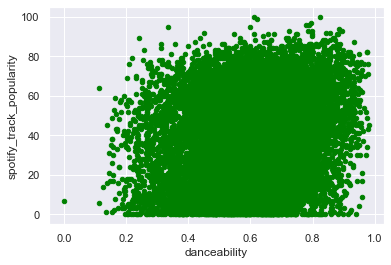

In [13]:
Danceability.plot.scatter(x='danceability', y='spotify_track_popularity', c='green');

In [14]:
Danceability = Danceability.loc[Danceability['spotify_track_popularity'] > 85]
Danceability.shape

(74, 4)

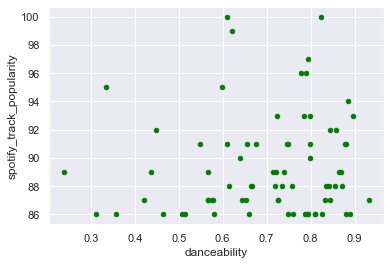

In [15]:
Danceability.plot.scatter(x='danceability', y='spotify_track_popularity', c='green');

In [16]:
#High Danceability Score on Spotify: 
Danceability.head(10)

,Song_x,danceability,spotify_track_popularity,spotify_track_preview_url
11590,223's,0.932,87.0,https://p.scdn.co/mp3-preview/3b3cbec1fa7d67c39c0fe5f274e438c4f1cc35b5?cid=b8d3901151d34489a160e3cf0ab1fa94
41391,The Box,0.896,93.0,https://p.scdn.co/mp3-preview/52c74a85b9b187b8f51bfe1c7b19a25f7624161a?cid=b8d3901151d34489a160e3cf0ab1fa94
7489,Going Bad,0.889,86.0,https://p.scdn.co/mp3-preview/29e19c68dd853994221a90103db28427f1185e33?cid=b8d3901151d34489a160e3cf0ab1fa94
146446,Vete,0.886,94.0,https://p.scdn.co/mp3-preview/2803e299f302d099cd11449e450d5bf21749fec5?cid=b8d3901151d34489a160e3cf0ab1fa94
7477,Futsal Shuffle 2020,0.881,91.0,https://p.scdn.co/mp3-preview/ab9ea4c65ee7c5ef65a55c1667ca522114da4c5c?cid=b8d3901151d34489a160e3cf0ab1fa94
29040,Ride It.,0.880,86.0,https://p.scdn.co/mp3-preview/2c4acac07bd693cb02d0ad8021d78b5854801e59?cid=b8d3901151d34489a160e3cf0ab1fa94
9637,Old Town Road,0.878,91.0,https://p.scdn.co/mp3-preview/d94ec2ebe62fd52cf038760f57c251c145346bb2?cid=b8d3901151d34489a160e3cf0ab1fa94
7851,Jocelyn Flores,0.872,88.0,https://p.scdn.co/mp3-preview/9fd5ccc86f318c303d582800e9f7d6f07f40440b?cid=b8d3901151d34489a160e3cf0ab1fa94
145502,Up,0.868,89.0,https://p.scdn.co/mp3-preview/83c0198f658d22ae67250a28430f7089715c4797?cid=b8d3901151d34489a160e3cf0ab1fa94
294817,Yellow Hearts,0.865,89.0,https://p.scdn.co/mp3-preview/50e8f9fbb9aa384e554c261c0a8701d411ceffdb?cid=b8d3901151d34489a160e3cf0ab1fa94


In [17]:
#Get 'Ride It' preview URL:
Ride_it_URL = Danceability['spotify_track_preview_url'].iloc[5]
Ride_it_URL

'https://p.scdn.co/mp3-preview/2c4acac07bd693cb02d0ad8021d78b5854801e59?cid=b8d3901151d34489a160e3cf0ab1fa94'

In [18]:
#Cross Check Series
Danceability['spotify_track_preview_url'].head(10)

11590     https://p.scdn.co/mp3-preview/3b3cbec1fa7d67c39c0fe5f274e438c4f1cc35b5?cid=b8d3901151d34489a160e3cf0ab1fa94
41391     https://p.scdn.co/mp3-preview/52c74a85b9b187b8f51bfe1c7b19a25f7624161a?cid=b8d3901151d34489a160e3cf0ab1fa94
7489      https://p.scdn.co/mp3-preview/29e19c68dd853994221a90103db28427f1185e33?cid=b8d3901151d34489a160e3cf0ab1fa94
146446    https://p.scdn.co/mp3-preview/2803e299f302d099cd11449e450d5bf21749fec5?cid=b8d3901151d34489a160e3cf0ab1fa94
7477      https://p.scdn.co/mp3-preview/ab9ea4c65ee7c5ef65a55c1667ca522114da4c5c?cid=b8d3901151d34489a160e3cf0ab1fa94
29040     https://p.scdn.co/mp3-preview/2c4acac07bd693cb02d0ad8021d78b5854801e59?cid=b8d3901151d34489a160e3cf0ab1fa94
9637      https://p.scdn.co/mp3-preview/d94ec2ebe62fd52cf038760f57c251c145346bb2?cid=b8d3901151d34489a160e3cf0ab1fa94
7851      https://p.scdn.co/mp3-preview/9fd5ccc86f318c303d582800e9f7d6f07f40440b?cid=b8d3901151d34489a160e3cf0ab1fa94
145502    https://p.scdn.co/mp3-preview/83c0198f658d22ae

In [20]:
#Download URL and save as MP3 file: 
import urllib.request
url = Ride_it_URL
filename = 'Dance_Score_0.88.mp3'
urllib.request.urlretrieve(url, filename)

('Dance_Score_0.88.mp3', <http.client.HTTPMessage at 0x7fd824bead90>)

In [22]:
#Play MP3 file: 
from IPython.display import Audio
Audio('Dance_Score_0.88.mp3')

In [23]:
#Low Danceability Score on Spotify: 
Danceability.tail(10)

,Song_x,danceability,spotify_track_popularity,spotify_track_preview_url
33114,Slow Dancing In The Dark,0.515,86.0,https://p.scdn.co/mp3-preview/483355f39bb264b9828633561ab14a7a48e75270?cid=b8d3901151d34489a160e3cf0ab1fa94
8446,Higher Power,0.507,86.0,https://p.scdn.co/mp3-preview/494d59484c6dbe0b181e7c0371e4aefd1c04a2d2?cid=b8d3901151d34489a160e3cf0ab1fa94
5877,Blue Christmas,0.465,86.0,https://p.scdn.co/mp3-preview/ddcfe1df4783b2e41f494dec4b13917fb8e1465d?cid=b8d3901151d34489a160e3cf0ab1fa94
20105,Heartbreak Anniversary,0.449,92.0,https://p.scdn.co/mp3-preview/680c39287fb49fdcb9e6690a1419a97fe67d8420?cid=b8d3901151d34489a160e3cf0ab1fa94
7980,Good Days,0.436,89.0,https://p.scdn.co/mp3-preview/297942feb416d50b8ee69f760daf1e2a1f39dabc?cid=b8d3901151d34489a160e3cf0ab1fa94
17203,All Of Me,0.422,87.0,https://p.scdn.co/mp3-preview/488c53471e56ff9f629652691444438951e880bb?cid=b8d3901151d34489a160e3cf0ab1fa94
22493,Say You Won't Let Go,0.358,86.0,https://p.scdn.co/mp3-preview/00825cb1779b31d68964eda6f2a7911fc2ae96c6?cid=b8d3901151d34489a160e3cf0ab1fa94
9593,All I Want For Christmas Is You,0.335,95.0,https://p.scdn.co/mp3-preview/ab4f06069148ef8510d8681164479601d4617bed?cid=b8d3901151d34489a160e3cf0ab1fa94
2463,Christmas Lights,0.312,86.0,https://p.scdn.co/mp3-preview/83bc99b80b9bd0115cbd1ff6447152f60f8c4386?cid=b8d3901151d34489a160e3cf0ab1fa94
8238,It's The Most Wonderful Time Of The Year,0.240,89.0,https://p.scdn.co/mp3-preview/6b5b5e401c3803f9ff6ff877fe79fae9f22e162b?cid=b8d3901151d34489a160e3cf0ab1fa94


In [25]:
#Get 'All of Me' preview URL:
All_Of_Me = Danceability['spotify_track_preview_url'].iloc[-5]
All_Of_Me

'https://p.scdn.co/mp3-preview/488c53471e56ff9f629652691444438951e880bb?cid=b8d3901151d34489a160e3cf0ab1fa94'

In [26]:
#Download URL and save as MP3 file: 
#import urllib.request
url = All_Of_Me
filename = 'Dance_Score_0.42.mp3'
urllib.request.urlretrieve(url, filename)

('Dance_Score_0.42.mp3', <http.client.HTTPMessage at 0x7fd83069f4c0>)

In [27]:
#Play MP3 file: 
from IPython.display import Audio
Audio('Dance_Score_0.42.mp3')